In [22]:
from __future__ import division
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']


import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# For time stamps
from datetime import datetime

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Dropout,BatchNormalization,Conv1D,Flatten,MaxPooling1D,LSTM
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Set up End and Start times for data grab
tech_list = ['0002.HK', '0003.HK', '0012.HK', '0017.HK']
# tech_list = ['0002.HK', '0003.HK', '0012.HK', '0017.HK','1398.HK','3988.HK','0669.HK','2382.HK','1299.HK','0388.HK']
# company_name = ['中電', '煤氣', '恒基', '新世界','工商','中國銀行','創科實業','友邦','港交所']
dfs = {}  # 使用字典存储每个股票的数据

for stock in tech_list:
    data = yf.download(stock, "2011-01-01", "2018-12-31")
    dfs[stock] = data    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [24]:
data = dfs[tech_list[2]].filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .65 ))
print(training_data_len)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset).round(4)

scaled_data.shape

1281


(1970, 1)

In [25]:
window = 15 #before w to now day
target = 5 #further t day
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(window, len(train_data)-target):
    x_train.append(train_data[i-window:i, 0])
    y_train.append(train_data[i+target, 0])
        
# # Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# # Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# # x_train.shape
for i in range(5):
    print("x_train:", x_train[i], ", output:", y_train[i])
print("x_train:", x_train.shape, ", output:", y_train.shape)


x_train: [[0.3729]
 [0.3882]
 [0.3846]
 [0.4152]
 [0.4152]
 [0.4044]
 [0.4206]
 [0.4224]
 [0.4062]
 [0.3927]
 [0.3972]
 [0.3999]
 [0.4044]
 [0.3918]
 [0.3792]] , output: 0.3693
x_train: [[0.3882]
 [0.3846]
 [0.4152]
 [0.4152]
 [0.4044]
 [0.4206]
 [0.4224]
 [0.4062]
 [0.3927]
 [0.3972]
 [0.3999]
 [0.4044]
 [0.3918]
 [0.3792]
 [0.3819]] , output: 0.3684
x_train: [[0.3846]
 [0.4152]
 [0.4152]
 [0.4044]
 [0.4206]
 [0.4224]
 [0.4062]
 [0.3927]
 [0.3972]
 [0.3999]
 [0.4044]
 [0.3918]
 [0.3792]
 [0.3819]
 [0.381 ]] , output: 0.381
x_train: [[0.4152]
 [0.4152]
 [0.4044]
 [0.4206]
 [0.4224]
 [0.4062]
 [0.3927]
 [0.3972]
 [0.3999]
 [0.4044]
 [0.3918]
 [0.3792]
 [0.3819]
 [0.381 ]
 [0.3801]] , output: 0.3603
x_train: [[0.4152]
 [0.4044]
 [0.4206]
 [0.4224]
 [0.4062]
 [0.3927]
 [0.3972]
 [0.3999]
 [0.4044]
 [0.3918]
 [0.3792]
 [0.3819]
 [0.381 ]
 [0.3801]
 [0.3765]] , output: 0.3405
x_train: (1261, 15, 1) , output: (1261,)


Epoch 1/10


c:\Users\bruce\anaconda3\envs\trading\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


253/253 [==============================] - 5s 8ms/step - loss: 0.0733
Epoch 2/10
253/253 [==============================] - 2s 8ms/step - loss: 0.0175
Epoch 3/10
253/253 [==============================] - 2s 7ms/step - loss: 0.0056
Epoch 4/10
253/253 [==============================] - 2s 8ms/step - loss: 0.0055
Epoch 5/10
253/253 [==============================] - 2s 7ms/step - loss: 0.0050
Epoch 6/10
253/253 [==============================] - 2s 8ms/step - loss: 0.0047
Epoch 7/10
253/253 [==============================] - 2s 7ms/step - loss: 0.0045
Epoch 8/10
253/253 [==============================] - 2s 7ms/step - loss: 0.0046
Epoch 9/10
253/253 [==============================] - 2s 8ms/step - loss: 0.0045
Epoch 10/10
253/253 [==============================] - 2s 8ms/step - loss: 0.0041


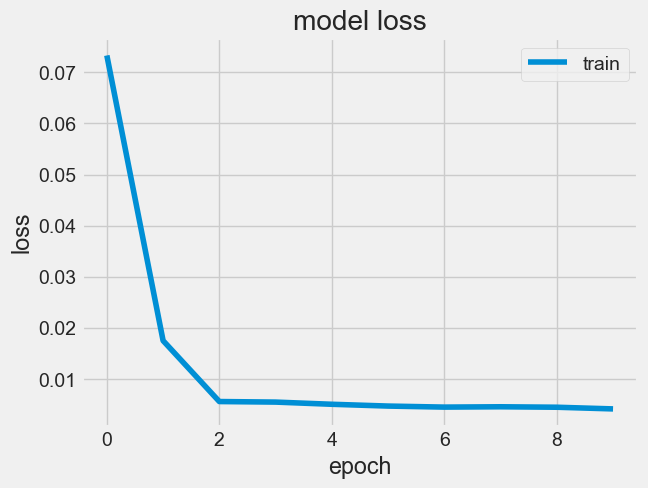

In [26]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(32, return_sequences = False))
model.add(Dropout(0.1))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
optimizer = Adam(lr=1e-5)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=5, epochs=10)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [27]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - window: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len+target:, :]
for i in range(window, len(test_data)-target):
    x_test.append(test_data[i-window:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)


# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

22/22 [==============================] - 1s 4ms/step


1.6844900633863937

C:\Users\bruce\AppData\Local\Temp\ipykernel_15028\16180517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


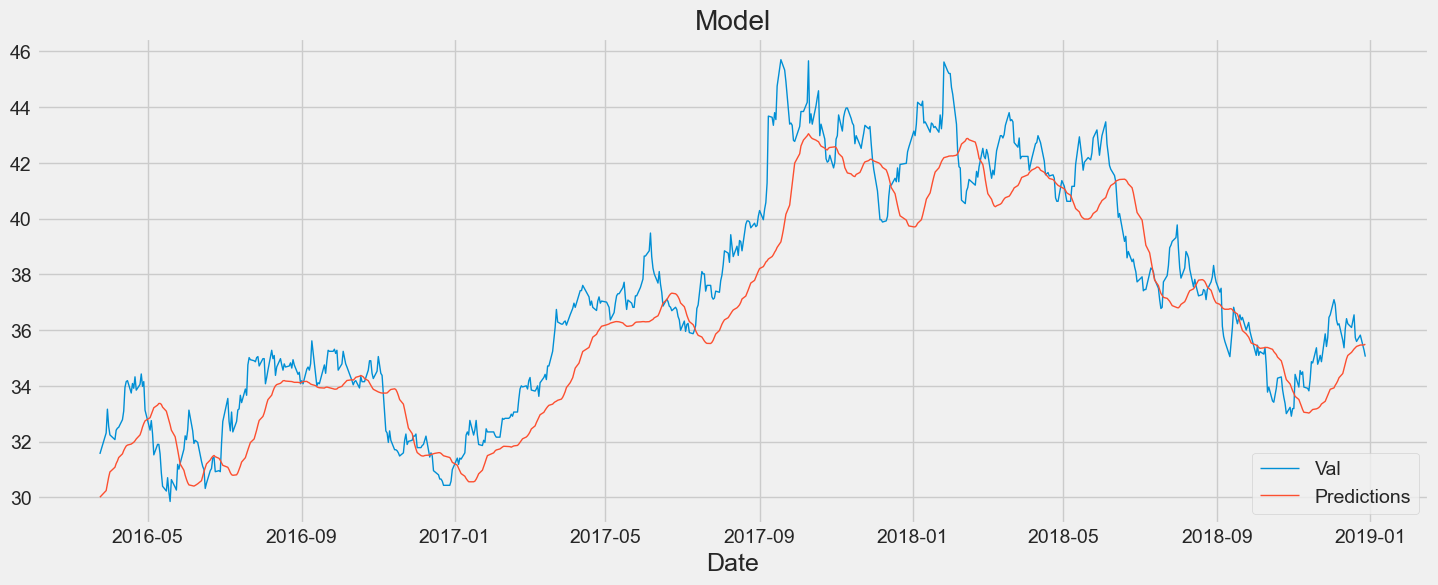

In [28]:
# Plot the data
valid = data[training_data_len+target:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.plot(valid[['Close', 'Predictions']],linewidth=1)
plt.legend([ 'Val', 'Predictions'], loc='lower right')
plt.show()